# Pymaceuticals Inc.
---

### Analysis

- Majority of the mice in this study were treated using Capomulin and Ramicane. There is a visibly strong/positive correlation between weight and tumor volume for capomulin treated mice, showing the heavier the mice the larger the tumor.
- Mice treated with Capomulin showed significant improvement in tumor volume by the end of the study. Among all the regimens analyzed, Capomulin achieved the second-best results, following the Ramicane regimen. Further research is necessary to conduct a more in-depth analysis of both treatments and to compare the effectiveness of Capomulin and Ramicane
 

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
study_data_complete = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
study_data_complete.head(10)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [4]:
# Checking the number of mice. = use .unique() function
len(study_data_complete["Mouse ID"].unique())

249

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouse_ids = study_data_complete.loc[study_data_complete.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mouse_ids[0]

'g989'

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mouse_data = study_data_complete.loc[study_data_complete["Mouse ID"] == duplicate_mouse_ids[0]]
duplicate_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#using .isin() 
clean_study_data_complete = study_data_complete[study_data_complete["Mouse ID"].isin(duplicate_mouse_ids)==False]
clean_study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.
len(clean_study_data_complete["Mouse ID"].unique())

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

sumStats = clean_study_data_complete.describe()

sumStatsDrug = clean_study_data_complete.groupby("Drug Regimen").describe

meanStatsDrug = clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
medStatsDrug = clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
varStatsDrug = clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
stdevStatsDrug = clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
semStatsDrug = clean_study_data_complete.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

summaryDF = pd.DataFrame({
    "Mean" : meanStatsDrug,
    "Median" : medStatsDrug,
    "Variance" : varStatsDrug,
    "Standard Deviation" : stdevStatsDrug,
    "Standard Error of Mean" : semStatsDrug
    
})

print(summaryDF)

                   Mean     Median   Variance  Standard Deviation  \
Drug Regimen                                                        
Capomulin     40.675741  41.557809  24.947764            4.994774   
Ceftamin      52.591172  51.776157  39.290177            6.268188   
Infubinol     52.884795  51.820584  43.128684            6.567243   
Ketapril      55.235638  53.698743  68.553577            8.279709   
Naftisol      54.331565  52.509285  66.173479            8.134708   
Placebo       54.033581  52.288934  61.168083            7.821003   
Propriva      52.320930  50.446266  43.852013            6.622085   
Ramicane      40.216745  40.673236  23.486704            4.846308   
Stelasyn      54.233149  52.431737  59.450562            7.710419   
Zoniferol     53.236507  51.818479  48.533355            6.966589   

              Standard Error of Mean  
Drug Regimen                          
Capomulin                   0.329346  
Ceftamin                    0.469821  
Infubinol      

In [10]:
# Assemble the resulting series into a single summary DataFrame.
summaryDict = {
    "Mean Tumor Volume": meanStatsDrug,
    "Median Tumor Volume": medStatsDrug,
    "Tumor Volume Variance": varStatsDrug,
    "Tumor Volume Std. Dev.": stdevStatsDrug,
    "Tumor Volume Std. Err.": semStatsDrug,
}
df = pd.DataFrame(summaryDict)
df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
dfl = clean_study_data_complete.groupby("Drug Regimen").agg(
    {"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]}
)
dfl


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [12]:
# generate the series for all drug regimens - taking counts of time points (count of occurences of each drug regimen)
counts = clean_study_data_complete["Drug Regimen"].value_counts()
counts

Drug Regimen
Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: count, dtype: int64

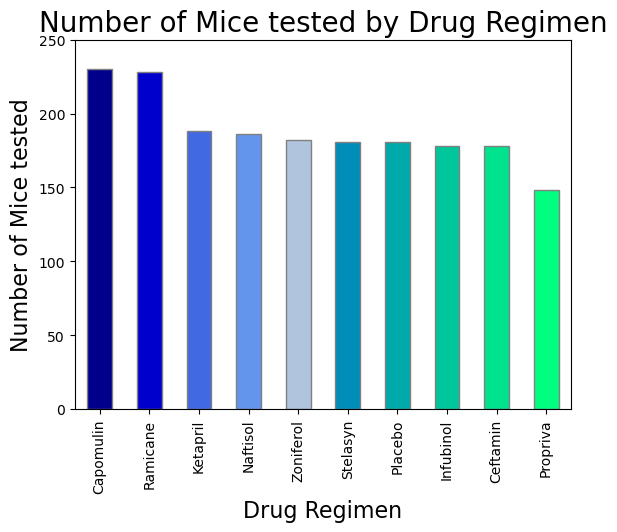

In [52]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#counts.plot(kind="bar", 
 #           color=['grey', 'yellow', 'green', 'blue', 'cyan', 'orange', 'purple', 'pink', 'olive', 'brown'])

#plt.xlabel("Drug Regimen")
#plt.ylabel("Number of Mice Tested")
#plt.title("Number of Mice tested by Drug Regimen")
#plt.xticks(rotation=90)
#plt.show()


counts.plot(kind='bar', color=['darkblue','mediumblue','royalblue','cornflowerblue','lightsteelblue','#008DB8','#00AAAA','#00C69C','#00E28E','#00FF80'], alpha=1, edgecolor='gray', align="center")

# Set x-label, y-label, and a title:
plt.title('Number of Mice tested by Drug Regimen',fontsize=20)
plt.xlabel('Drug Regimen',fontsize=16, color='black')
plt.ylabel("Number of Mice tested",fontsize=16, color='black')

# Set y limits:
plt.ylim(0, 250)

plt.show()

In [14]:
#show the names of the regimens (will be the x value)
counts.index.values

array(['Capomulin', 'Ramicane', 'Ketapril', 'Naftisol', 'Zoniferol',
       'Stelasyn', 'Placebo', 'Infubinol', 'Ceftamin', 'Propriva'],
      dtype=object)

In [15]:
# show the values of the counts (will be the y value)
counts.values 

array([230, 228, 188, 186, 182, 181, 181, 178, 178, 148], dtype=int64)

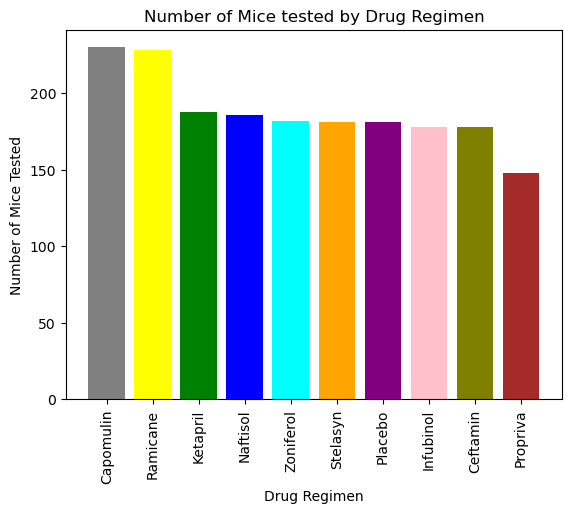

In [16]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(counts.index.values,
        counts.values,
        color=['grey', 'yellow', 'green', 'blue', 'cyan', 'orange', 'purple', 'pink', 'olive', 'brown'])

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.title("Number of Mice tested by Drug Regimen")
plt.xticks(rotation=90)
plt.show()

In [17]:
#using value counts again, using counts of gender/sex (showing how many male and female mice in this study) 
gender_counts = clean_study_data_complete["Sex"].value_counts()
gender_counts

Sex
Male      958
Female    922
Name: count, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

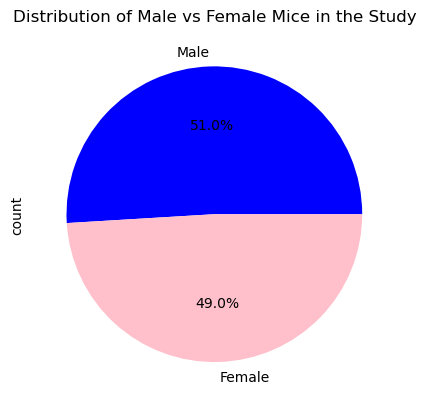

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts.plot (
    kind = "pie",
    autopct = "%1.1f%%",
    colors = ["blue", "pink"]
)
plt.title("Distribution of Male vs Female Mice in the Study")
plt.show

In [19]:
gender_counts.index.values

array(['Male', 'Female'], dtype=object)

In [20]:
gender_counts.values

array([958, 922], dtype=int64)

<function matplotlib.pyplot.show(close=None, block=None)>

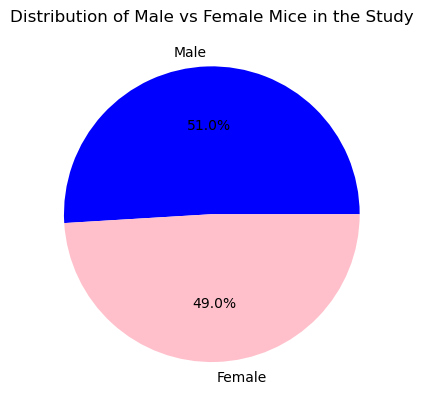

In [21]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie (
    gender_counts.values,
    labels=gender_counts.index.values,
    autopct = "%1.1f%%",
    colors = ["blue", "pink"]
)
plt.title("Distribution of Male vs Female Mice in the Study")
plt.show

## Quartiles, Outliers and Boxplots

In [22]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens
# Start by getting the last (greatest) timepoint ofr each mouse (max timepoint)
# group by mouaw ID -> get the max of the Timepoint column
#clean_study_data_complete.head()
maxTime = clean_study_data_complete.groupby("Mouse ID")["Timepoint"].max() #creates a series
# to convery the series to a dataframe, reset the index of the series 
maxTime = maxTime.reset_index()
maxTime.head()

,Mouse ID,Timepoint
0,a203,45
1,a251,45
2,a262,45
3,a275,45
4,a366,30


In [23]:
clean_study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [24]:
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# merge to keep data for the max timepoints of each mouse only
merged_data = maxTime.merge(clean_study_data_complete, on= ["Mouse ID", "Timepoint"], how="left")
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]





In [26]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

In [27]:
for treatment in treatment_list:
    #print(treatment)
    # Locate the rows which contain mice on each drug and get the tumor volumes
    info = merged_data.loc[merged_data["Drug Regimen"] == treatment]

info

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
3,a275,45,62.999356,3,Ceftamin,Female,20,28
21,b447,0,45.000000,0,Ceftamin,Male,2,30
22,b487,25,56.057749,1,Ceftamin,Female,6,28
25,b759,30,55.742829,1,Ceftamin,Female,12,25
58,f436,15,48.722078,2,Ceftamin,Female,3,25
75,h531,5,47.784682,0,Ceftamin,Male,5,27
88,j296,45,61.849023,3,Ceftamin,Female,24,30
94,k210,45,68.923185,3,Ceftamin,Male,15,28
106,l471,45,67.748662,1,Ceftamin,Female,7,28
107,l490,30,57.918381,3,Ceftamin,Male,24,26


In [28]:
for treatment in treatment_list:
    #print(treatment)
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume = merged_data.loc[merged_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]

final_tumor_volume

3      62.999356
21     45.000000
22     56.057749
25     55.742829
58     48.722078
75     47.784682
88     61.849023
94     68.923185
106    67.748662
107    57.918381
109    46.784535
110    59.851956
113    64.299830
134    59.741901
150    61.433892
154    64.192341
184    45.000000
188    52.925348
189    45.000000
209    67.527482
223    45.000000
228    64.634949
231    61.386660
238    68.594745
240    64.729837
Name: Tumor Volume (mm3), dtype: float64

In [29]:
#create / recreate empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []

for treatment in treatment_list:
    #print(treatment)
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume = merged_data.loc[merged_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    #adds each series to the empty tumor colume list
    tumor_volume_list.append(final_tumor_volume)
tumor_volume_list

[19     38.982878
 24     38.939633
 61     30.485985
 64     37.074024
 66     40.159220
 80     47.685963
 83     37.311846
 85     38.125164
 87     38.753265
 108    41.483008
 115    38.846876
 121    28.430964
 124    33.329098
 162    46.539206
 163    32.377357
 169    41.581521
 174    23.343598
 180    40.728578
 183    34.455298
 192    31.023923
 204    40.658124
 208    39.952347
 220    36.041047
 226    28.484033
 239    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 6      38.407618
 7      43.047543
 10     38.810366
 12     32.978522
 33     38.342008
 37     33.397653
 45     37.311236
 52     40.659006
 70     29.128472
 76     33.562402
 77     36.374510
 91     31.560470
 93     36.134852
 96     22.050126
 119    30.564625
 126    31.095335
 157    45.220869
 158    36.561652
 166    37.225650
 168    43.419381
 177    30.276232
 190    40.667713
 217    43.166373
 235    44.183451
 244    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0      67.973

In [30]:
#create / recreate empty list to fill with tumor vol data (for plotting)
tumor_volume_list = []

for treatment in treatment_list:
    print(treatment)
    # Locate the rows which contain mice on each drug and get the tumor volumes
    final_tumor_volume = merged_data.loc[merged_data["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    #adds each series to the empty tumor colume list
    tumor_volume_list.append(final_tumor_volume)

# Calculate the 25th percentile, 50th percentile (median), and 75th percentile of the tumor volume data.
    quartiles = final_tumor_volume.quantile([.25, .5, .75])
    # Extract lower and upper values fron the quartiles series 
    lowerq = quartiles [0.25]
    upperq = quartiles [0.75]
    # Calculate the Interquartile Range (IQR), which is the range of the middle 50% of the data.
    IQR = upperq - lowerq
    # Determine outliers using upper and lower bounds 
    lower_bound = lowerq - (1.5*IQR)
    upper_bound = upperq + (1.5*IQR)
    # Aplly logical condition fo filter out data point in last_tumor_vol_data
    # Outlier for each drug regimen will be idenfified 
    outliers = final_tumor_volume.loc[(final_tumor_volume < lower_bound) | (final_tumor_volume > upper_bound)] 
    if len(outliers) == 0:  
        # If no outliers, print a message indicating no potential outliers for the current treatment
        print(f"{treatment}'s potential outliers: None")
    else:  
        # If outliers are found, initialize the output message with the treatment name
        output = f"{treatment}'s potential outliers:"
        # Loop through each outlier value
        for i in outliers:  
            # Append the outlier value to the output message
            output += f" {i}"
        # Print the final message listing the outliers
        print(output)

Capomulin
Capomulin's potential outliers: None
Ramicane
Ramicane's potential outliers: None
Infubinol
Infubinol's potential outliers: 36.3213458
Ceftamin
Ceftamin's potential outliers: None


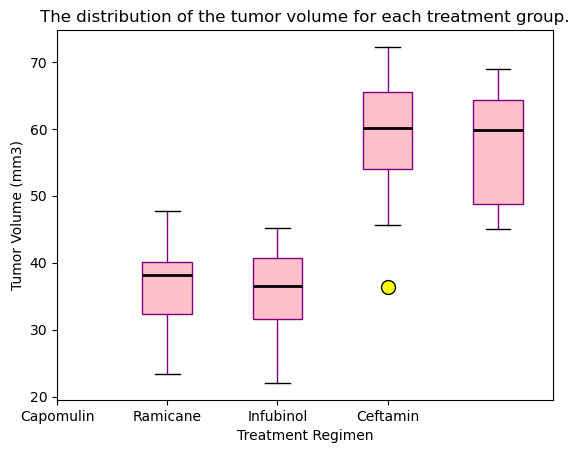

In [31]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tumor_volume_list, 
            notch=False,  # Disable notch for the box plot
            patch_artist=True,  # Fill the boxes with color
            # create box color
            boxprops=dict(facecolor='pink', color='purple'),  
            # whisker color and linewidth
            whiskerprops=dict(color='purple', linewidth=1),  
            # Set the cap color
            capprops=dict(color='black'),  
            # Set outlier properties/ colors
            flierprops=dict(markerfacecolor='yellow', marker='o', markersize=10),  
            # Set median line color and width
            medianprops=dict(color='black', linewidth=2))  
            

# Add labels and title
plt.title("The distribution of the tumor volume for each treatment group.")
plt.xlabel("Treatment Regimen")
plt.ylabel("Tumor Volume (mm3)")

# Set x-ticks to the treatment names
plt.xticks(ticks=range(len(treatment_list)), labels=treatment_list)

# Show the plot
plt.show()

## Line and Scatter Plots

In [32]:
clean_study_data_complete.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [33]:
capomulinDF = clean_study_data_complete.loc[clean_study_data_complete["Drug Regimen"] == "Capomulin"]
capomulinDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


In [34]:
# select a single mouse to generate a line plot of tumor volume vs. time point.
# Filter the data to get the rows where 'Mouse ID' is equal to "b742"
b742Data = capomulinDF.loc[capomulinDF["Mouse ID"] == "b742"]
b742Data # we just need the Timepoint (x) and Tumor Volume columns (y)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
229,b742,0,45.000000,0,Capomulin,Male,7,21
327,b742,5,41.534097,0,Capomulin,Male,7,21
682,b742,10,41.999228,0,Capomulin,Male,7,21
839,b742,15,39.524843,0,Capomulin,Male,7,21
935,b742,20,37.950355,0,Capomulin,Male,7,21
1224,b742,25,38.617684,0,Capomulin,Male,7,21
1308,b742,30,39.167949,0,Capomulin,Male,7,21
1614,b742,35,39.847576,0,Capomulin,Male,7,21
1676,b742,40,38.255627,0,Capomulin,Male,7,21
1829,b742,45,38.939633,0,Capomulin,Male,7,21


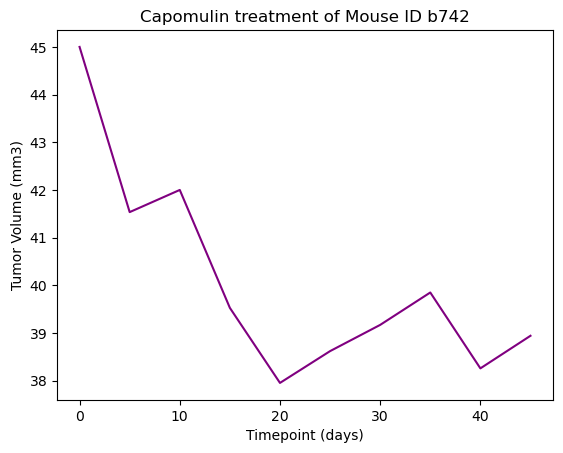

In [35]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
plt.plot(b742Data["Timepoint"],  
         b742Data["Tumor Volume (mm3)"],  # Extract the 'Tumor Volume (mm3)' column for the y-axis
         color="purple")  # Set the line color to red for better visibility
plt.title("Capomulin treatment of Mouse ID b742")  # Fixed the typo here
plt.ylabel("Tumor Volume (mm3)")  # Fixed the parentheses here
plt.xlabel("Timepoint (days)")
plt.show()

In [36]:
# Group the Capomulin data by 'Mouse ID' and calculate the mean for each group
capomulinAveragesDF = capomulinDF.groupby("Mouse ID").mean(numeric_only=True)
capomulinAveragesDF.head()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.7,9.0,22.0
b742,22.5,40.083699,0.0,7.0,21.0
f966,10.0,36.505973,0.0,16.0,17.0
g288,22.5,41.990097,0.8,3.0,19.0
g316,22.5,44.613344,1.0,22.0,22.0


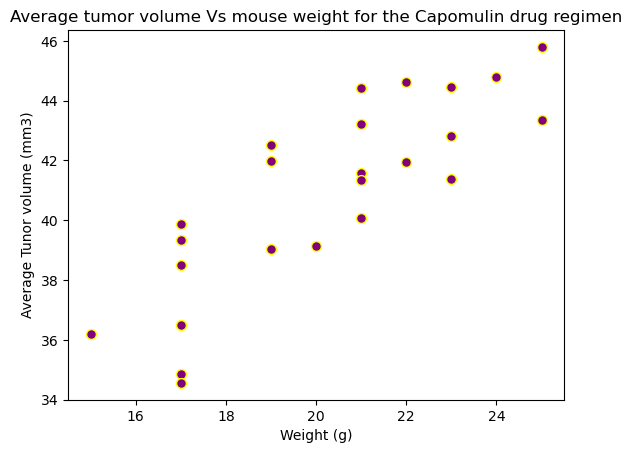

In [37]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
plt.scatter(
    capomulinAveragesDF["Weight (g)"],
    capomulinAveragesDF["Tumor Volume (mm3)"],
    facecolor= "purple",
    edgecolor= "yellow",
    s=50
)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tunor volume (mm3)")
plt.title("Average tumor volume Vs mouse weight for the Capomulin drug regimen")
plt.show()

## Correlation and Regression

In [38]:
# Calculate the correlation coefficient and a linear regression model
corr = st.pearsonr(capomulinAveragesDF["Weight (g)"], capomulinAveragesDF["Tumor Volume (mm3)"])[0]
print(f"The correlation between mouse weight and the average tumor volume is {corr:.2f}")

The correlation between mouse weight and the average tumor volume is 0.84


In [44]:
# Define x and y values
x_values = capomulinAveragesDF["Weight (g)"]
y_values = capomulinAveragesDF["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)

regressValues = x_values * slope + intercept  
lineEq = f"y = {slope: .2f}x + {intercept:.2f}"

The correlation between mouse weight and the average tumor volume is 0.84


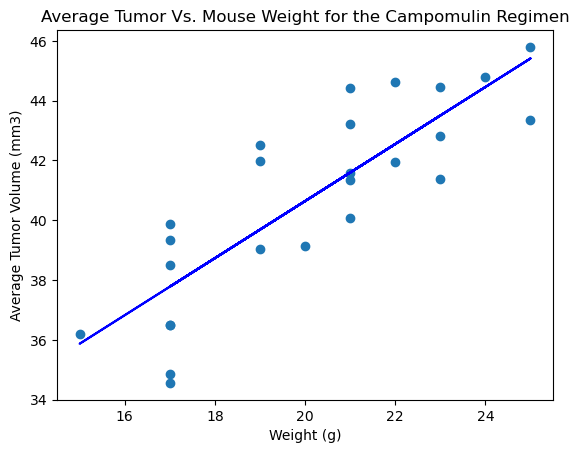

In [47]:
# Create a scatter plot for the data points
plt.scatter(x_values, y_values)
plt.plot (x_values, regressValues, "b-")
plt.xlabel ("Weight (g)")
plt.ylabel ("Average Tumor Volume (mm3)")
plt.title ("Average Tumor Vs. Mouse Weight for the Campomulin Regimen")
print(f"The correlation between mouse weight and the average tumor volume is {corr:.2f}")
plt.show()